In [1]:
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.formula.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침


# 분산분석 관련 패키지
import scikit_posthocs as sp  # 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd    # 사후검정
from statsmodels.sandbox.stats.multicomp import MultiComparison    # MultiComparison을 활용한 사후검정 시 사용
from statsmodels.graphics.factorplots import interaction_plot    # 상호작용효과 그래프 출력 시 사용


# 시계열 관련 statsmodels 패키지
from statsmodels.tsa.api import *
from statsmodels.tsa.ar_model import *
from statsmodels.tsa.arima.model import *
from statsmodels.tsa.arima_process import *
from statsmodels.tsa.statespace import *
from statsmodels.graphics.api import *
from statsmodels.graphics.tsaplots import *

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공
from sklearn.multiclass import OneVsRestClassifier  # multiclass 분류기 알고리즘 제공
from sklearn.pipeline import *

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # 변수선택 알고리즘 포함
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False
#
#

# 데이터 불러오기 및 데이터프레임 생성

In [2]:
df_card = pd.read_csv(r'C:\Users\Boanerges\GitHub\rawdata_(Lage Files)\creditcard.csv')
df_card = df_card.drop('Time', axis = 1)

In [3]:
df_card.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [4]:
# 편의상 종속변수 'Class' 컬럼을 맨 앞에 배치

df_card = df_card[['Class', 'Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]

df_card

,Class,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0,149.62,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,0,2.69,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,0,378.66,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,0,123.50,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,0,69.99,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0,0.77,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,0,24.79,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,0,67.88,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,0,10.00,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


# 데이터 정보 및 분포 확인

In [5]:
# 데이터 정보 확인

df_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Class   284807 non-null  int64  
 1   Amount  284807 non-null  float64
 2   V1      284807 non-null  float64
 3   V2      284807 non-null  float64
 4   V3      284807 non-null  float64
 5   V4      284807 non-null  float64
 6   V5      284807 non-null  float64
 7   V6      284807 non-null  float64
 8   V7      284807 non-null  float64
 9   V8      284807 non-null  float64
 10  V9      284807 non-null  float64
 11  V10     284807 non-null  float64
 12  V11     284807 non-null  float64
 13  V12     284807 non-null  float64
 14  V13     284807 non-null  float64
 15  V14     284807 non-null  float64
 16  V15     284807 non-null  float64
 17  V16     284807 non-null  float64
 18  V17     284807 non-null  float64
 19  V18     284807 non-null  float64
 20  V19     284807 non-null  float64
 21  V20     28

In [ ]:
# 데이터 분포 확인 (distplot())

plt.figure(figsize=(20,30))

for i in list(range(0,30)):
    plt.subplot( 8, 4, 1+i ) # 그래프 배열 4행 8열
    sb.distplot( df_card.iloc[:, i] )    

In [ ]:
# boxplot 확인

plt.figure(figsize=(20,30))

for i in list(range(0,30)):
    plt.subplot( 8, 4, 1+i ) # 그래프 배열 4행 8열
    sb.boxplot( df_card.iloc[:, i] )    

In [ ]:
# Label 분포 불균형 여부 확인

df_card.groupby('Class').count()

# 클래스 별 데이터 분포의 불균형이 심각함을 알 수 있다.

# 기술 통계량 및 중간값, 결측치, 왜도, 첨도 확인

In [ ]:
# 중간값, 결측치, 왜도, 첨도를 포함하여 기술통계량을 출력하는 함수 생성

def stats_frame(df = None):
    df_stats = df.describe().T
    
    median_results = []
    null_results = []
    skew_results = []
    skew_abs_results = []
    kurtosis_results = []
    kurtosis_abs_results = []

    for idx, val in enumerate(df_stats.index):
        median_results.append(df[val].median())
        null_results.append(df[val].isnull().sum())
        skew_results.append(df[val].skew())
        skew_abs_results.append( abs(df[val].skew()) )
        kurtosis_results.append(df[val].kurtosis())
        kurtosis_abs_results.append( abs(df[val].kurtosis()) )          

    df_stats['median'] = median_results
    df_stats['missing'] = null_results
    df_stats['skewness'] = skew_results
    df_stats['kurtosis'] = kurtosis_results
    df_stats['skewness_abs'] = skew_abs_results
    df_stats['kurtosis_abs'] = kurtosis_abs_results

    pd.options.display.float_format = '{:.3f}'.format
    return df_stats
    pd.reset_option('display.float_format')

In [ ]:
# 기술통계량 데이터프레임을 왜도 및 첨도 기준으로 내림차순 정렬

stats_result = stats_frame(df_card)

stats_result.sort_values(['skewness_abs','kurtosis_abs'], ascending = False)

# 왜도/첨도를 기준으로 정규성을 벗어난 컬럼 찾기

In [ ]:
stats_result = stats_frame(df_card)

stats_result[ ( abs( stats_result['skewness_abs'] ) > 3) |
              ( abs( stats_result['kurtosis_abs'] ) > 10) ].sort_values(['skewness_abs','kurtosis_abs'], ascending = False)

# 상관관계 확인

In [ ]:
# 상관계수 산출 (pingouin 패키지)
df_corr = df_card.pairwise_corr()

# 상관계수의 절대값 컬럼 추가
df_corr['ABS(r)'] = abs(df_corr['r'])

# 종속변수와의 상관계수의 절대값이 큰 순서대로 정렬
df_corr[ df_corr['X'] == 'Class' ].sort_values('ABS(r)', ascending = False)

In [ ]:
# 종속변수와 양의 상관계수가 큰 순서대로 정렬
df_corr[ df_corr['X'] == 'Class' ].sort_values('r', ascending = False).head(10)

In [ ]:
# 종속변수와 음의 상관계수가 큰 순서대로 정렬
df_corr[ df_corr['X'] == 'Class' ].sort_values('r', ascending = True).head(10)

In [ ]:
# 히트맵 시각화

plt.figure(figsize=(10,8))
sb.heatmap(df_card.corr(), cmap = 'RdBu')
plt.show()

# 이상치 처리

## 이상치 목록 확인

In [ ]:
# 변수별 이상치의 인덱스를 데이터프레임으로 생성

def get_outlier_index(df=None, weight=1.5):
    
    result = pd.DataFrame()
    
    for i in list(range(0, df.shape[1])):
        
        # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
        fraud = df.iloc[:,i]
        quantile_25 = np.percentile(fraud.values, 25)
        quantile_75 = np.percentile(fraud.values, 75)
        
        # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
        iqr = quantile_75 - quantile_25
        iqr_weight = iqr * weight
        lowest_val = quantile_25 - iqr_weight
        highest_val = quantile_75 + iqr_weight
        
        # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환.
        outlier = fraud[(fraud < lowest_val) | (fraud > highest_val)]
        
        # 이상치가 존재하는 변수명과 해당 변수의 이상치의 index 주소를 데이터프레임에 추가
        if len(outlier) == 0:
            pass
        else:
            data = pd.DataFrame( { outlier.name : outlier.index.tolist() } )
            result = pd.concat([result,data], axis = 1)
    
    return result

In [ ]:
outlier_index = get_outlier_index(df_card, weight=1.5)
outlier_index

In [ ]:
outlier_index.count()

plt.figure(figsize=(20,5))
plt.bar(outlier_index.count().index, outlier_index.count().values)

## 이상치 제거

In [ ]:
# 이상치를 제거한 데이터프레임을 생성하는 함수 

def get_outlier_drop(df=None, weight=1.5):

    outlier_index = list()
    df_outlier_drop = df.copy()
    
    for i in list(range(1, df.shape[1])):  # 'Class' 변수를 제외하고 이상치를 탐색하기 위해 범위를 1부터 시작한다.
                                           # 종속변수 'Class'의 경우, 분포 불균형으로 인해 1을 모두 이상치로 인식함.
        
        # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
        fraud = df.iloc[:,i]
        quantile_25 = np.percentile(fraud.values, 25)
        quantile_75 = np.percentile(fraud.values, 75)
        
        # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
        iqr = quantile_75 - quantile_25
        iqr_weight = iqr * weight
        lowest_val = quantile_25 - iqr_weight
        highest_val = quantile_75 + iqr_weight
        
        # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환.
        outlier = fraud[ (fraud < lowest_val) | (fraud > highest_val) ]
        
        # 이상치가 존재하는 행 index 주소를 리스트에 추가
        if len(outlier) == 0:
            pass
        else:
            outlier_index.extend(outlier.index)
            
    # 이상치가 존재하는 행을 모두 제거한 데이터프레임 생성
    df_outlier_drop = df_outlier_drop.drop( np.unique(outlier_index), axis=0)
        
    return df_outlier_drop

In [ ]:
# 종속변수를 제외한 변수들 중 이상치 있는 행을 모두 제거
outlier_drop_result = get_outlier_drop( df_card, weight=1.5)
outlier_drop_result

In [ ]:
# 'Class' 별 데이터 개수 확인
outlier_drop_result.groupby('Class').count()

# 레이블 분포의 불균형이 더욱 심해졌음.'
# 오버샘플링 또는 언더샘플링 필요

In [ ]:
# 기술통계량 확인
stats_frame(outlier_drop_result)

# 이상치를 제거하자 데이터들의 왜도,첨도가 대부분 정상범위 안으로 들어옴.

In [ ]:
plt.figure(figsize=(20,30))

for i in list(range(0,29)):
    plt.subplot( 8, 4, 1+i ) # 그래프 배열 4행 8열
    sb.distplot( outlier_drop_result.iloc[:, i] ) 

In [ ]:
# boxplot 확인

plt.figure(figsize=(20,30))

for i in list(range(0,30)):
    plt.subplot( 8, 4, 1+i ) # 그래프 배열 4행 8열
    sb.boxplot( outlier_drop_result.iloc[:, i] )    

In [ ]:
ㅁㄴㅇㄻㄴㅇㄹ

# 데이터 변환 및 Scaling

## 정규성을 크게 벗어난 데이터에 대해 Log Transform

In [ ]:
# 로그 변환하여 새로운 데이터프레임에 저장
df_log = df_card.copy()

# 로그변환할 데이터 목록 생성 ('Class' 데이터는 종속변수이므로 제외)
trans_list = ['V1', 'V2', 'V8', 'V17', 'V21', 'V23', 'V28', 'Amount']

for i in trans_list:
    if df_card[i].min() >= 0:
        pass
    else:
        df_log[i] = np.log1p( df_log[i]**2 )
        
df_log

In [ ]:
plt.figure(figsize=(20,40))

for i in list(range(0,30)):
    plt.subplot( 8, 4, 1+i ) # 그래프 배열 4행 8열
    plt.settitle = df_log.iloc[:, i].name
    stats.probplot( df_log.iloc[:, i], plot = plt )    

In [ ]:
plt.figure(figsize=(20,30))

for i in list(range(0,30)):
    plt.subplot( 8, 4, 1+i ) # 그래프 배열 4행 8열
    sb.distplot( df_log.iloc[:, i] )   

In [ ]:
stats_frame(df_log)

## Scaling (StandardScaler)

In [ ]:
scaled = StandardScaler().fit_transform(df_log.drop('Class', axis = 1))

df_scaled = df_card.copy()

for i in list(range( 0, df_log.drop('Class', axis = 1).shape[1]) ):
    df_scaled.iloc[:,i] = scaled[:,i]
    
df_scaled

In [ ]:
plt.figure(figsize=(20,30))

for i in list(range(0,30)):
    plt.subplot( 8, 4, 1+i ) # 그래프 배열 4행 8열
    sb.distplot( df_scaled.iloc[:, i] )   

In [ ]:
stats_frame(df_scaled)

# 결측치

## 결측치 인식

### [Problem] 결측치 파악 및 개수 확인
- airquality 데이터의 Ozone 변수에 대한 na 값 존재 여부를 파악하고, 만약 na가 존재한다면 결측치의 개수를 확인

In [5]:
import pandas as pd

df_airq = pd.read_csv( "C:/Users/Administrator/GitHub/TIL/ADP_study/rawdata/airquality.csv",
                      index_col='Unnamed: 0' )

display(df_airq)

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
149,30.0,193.0,6.9,70,9,26
150,NaN,145.0,13.2,77,9,27
151,14.0,191.0,14.3,75,9,28
152,18.0,131.0,8.0,76,9,29


In [2]:
# 각각의 데이터들이 결측치인지 확인
pd.isnull(df_airq)
df_airq.isnull()

# 각각의 데이터들이 결측치가 아닌지 확인
pd.notnull(df_airq)
df_airq.notnull()

,Ozone,Solar.R,Wind,Temp,Month,Day
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
5,False,False,True,True,True,True
...,...,...,...,...,...,...
149,True,True,True,True,True,True
150,False,True,True,True,True,True
151,True,True,True,True,True,True
152,True,True,True,True,True,True


In [3]:
# 컬럼별 결측치 개수
df_airq.isnull().sum()

# 컬럼별 결측치가 아닌 데이터 개수
df_airq.notnull().sum()

Ozone      116
Solar.R    146
Wind       153
Temp       153
Month      153
Day        153
dtype: int64

In [4]:
# Ozone 변수에 존재하는 na의 개수 산출
df_airq['Ozone'].isnull().sum()

37

### [Problem] 특정 컬럼에서 결측치가 아닌 데이터와 결측치의 개수 비교

(array([False,  True]), array([116,  37], dtype=int64))

False    116
True      37
Name: Ozone, dtype: int64

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ozone', ylabel='count'>

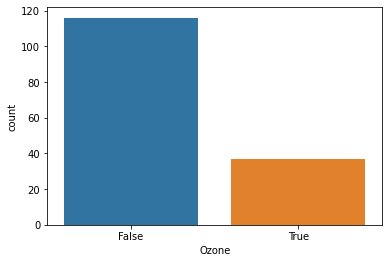

In [5]:
# Ozone 변수에서 na가 아닌 값과 na값의 개수 비교
x = df_airq['Ozone'].isnull()

# numpy 를 이용
import numpy as np
display( np.unique(x, return_counts=True) )
print()

# pandas 를 이용
display( pd.Series( x.value_counts() ) )
print()

# seaborn 을 이용
import seaborn as sb
display( sb.countplot(x) )

#### [Problem] 컬럼별 결측치 개수 확인
- airquality 데이터의 모든 변수에 대해 각각 결측치(na값)가 몇 개씩 존재하는지 확인

In [6]:
df_airq.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

#### [Problem] 결측치에 따른 데이터 분류
- airquality 데이터에서 na값이 하나라도 존재하는 행들을 air_na 함수에 저장하고, na값을 하나도 가지지 않는 행들을 air_com 변수에 저장

In [7]:
# 각각의 행 별로 결측치의 개수 합 계산
y = df_airq.isnull().sum(1)

# 행별 결측치에 따라 데이터 분류

air_na = df_airq.loc[ y != 0 ]

air_com = df_airq.loc[ y == 0 ]

display( 'air_na', air_na.head(), print(), 'air_com', air_com.head())

'air_na'

,Ozone,Solar.R,Wind,Temp,Month,Day
5,NaN,NaN,14.3,56,5,5
6,28.0,NaN,14.9,66,5,6
10,NaN,194.0,8.6,69,5,10
11,7.0,NaN,6.9,74,5,11
25,NaN,66.0,16.6,57,5,25


None

'air_com'

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
7,23.0,299.0,8.6,65,5,7


### 2절. 결측치 처리

#### [Problem] 결측치 제거
- airquality의 Ozone 에서 결측치가 존재하는 경우, 결측치가 존재하는 행 제거

In [8]:
import numpy as pd
import pandas as pd

# airquality 데이터 프레임 생성
df_airq = pd.read_csv( "C:/Users/Administrator/GitHub/TIL/ADP_study/rawdata/airquality.csv",
                      index_col='Unnamed: 0' )
display(df_airq)

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
149,30.0,193.0,6.9,70,9,26
150,NaN,145.0,13.2,77,9,27
151,14.0,191.0,14.3,75,9,28
152,18.0,131.0,8.0,76,9,29


In [9]:
# 결측치가 포함된 행 제거: .dropna() 사용
# axis 옵션은 행을 삭제할 경우 1, 열을 삭제할 경우 0 이다.

df_airq.dropna(axis=0)    

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
7,23.0,299.0,8.6,65,5,7
...,...,...,...,...,...,...
148,14.0,20.0,16.6,63,9,25
149,30.0,193.0,6.9,70,9,26
151,14.0,191.0,14.3,75,9,28
152,18.0,131.0,8.0,76,9,29


#### [Problem] 평균 대치법
- airquality의 Ozone 변수값이 결측치일 경우, 결측치를 Ozone 변수 값들의 평균으로 대치

In [10]:
# airqulity 의 Ozone 컬럼의 평균 구하기
ozone_mean = df_airq.describe().loc['mean','Ozone']
print('Ozone 평균값:', ozone_mean)
print()

# Ozone 데이터 값 중 결측치를 평균값으로 대체
# .fillna() 사용
df_airq['Ozone'].fillna(ozone_mean, inplace=True)
df_airq

Ozone 평균값: 42.12931034482759



,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.00000,190.0,7.4,67,5,1
2,36.00000,118.0,8.0,72,5,2
3,12.00000,149.0,12.6,74,5,3
4,18.00000,313.0,11.5,62,5,4
5,42.12931,NaN,14.3,56,5,5
...,...,...,...,...,...,...
149,30.00000,193.0,6.9,70,9,26
150,42.12931,145.0,13.2,77,9,27
151,14.00000,191.0,14.3,75,9,28
152,18.00000,131.0,8.0,76,9,29


#### [Problem] 결측치를 중위수로 대치
- airquality의 Ozone 변수값이 결측치일 경우, 결측치를 Ozone 변수 값들의 중위수로 대치

In [11]:
# 위 문제에서 NA 값을 평균값으로 대체하는 원본 객체 수정이 발생했기 때문에 데이터 프레임을 새로 생성한다.

df_airq = pd.read_csv( "C:/Users/Administrator/GitHub/TIL/ADP_study/rawdata/airquality.csv",
                      index_col='Unnamed: 0' )
display(df_airq)

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
149,30.0,193.0,6.9,70,9,26
150,NaN,145.0,13.2,77,9,27
151,14.0,191.0,14.3,75,9,28
152,18.0,131.0,8.0,76,9,29


In [12]:
# airqulity 의 Ozone 컬럼의 중위수 구하기
ozone_median = df_airq.describe().loc['50%', 'Ozone']
print('Ozone 중위수:', ozone_median)

## Ozone 데이터 값 중 결측치를 중위수로 대체
df_airq['Ozone'].fillna(ozone_median, inplace=True)
df_airq

Ozone 중위수: 31.5


,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,31.5,NaN,14.3,56,5,5
...,...,...,...,...,...,...
149,30.0,193.0,6.9,70,9,26
150,31.5,145.0,13.2,77,9,27
151,14.0,191.0,14.3,75,9,28
152,18.0,131.0,8.0,76,9,29
